In [27]:
import os
import sys
import pandas as pd
# Ensure the script directory is in the Python path
sys.path.append('/app/scripts')

from TabularDataset import TabularDataset
from TabNetModelTester import TabNetModelTester
from SimpleTrainingMetricsPlotter import SimpleTrainingMetricsPlotter



In [28]:
# Main folder
root_dir  = '/app'

# Data folders
data_folder = os.path.join(root_dir, 'data')

# Training data paths
radiomics_train_val_path = os.path.join(data_folder, 'radiomics_features_train_val.csv')
deep_learning_train_val_path = os.path.join(data_folder, 'deep_features_train_val.csv')

# Test data paths
radiomics_test_path = os.path.join(data_folder, 'radiomics_features_test.csv')
deep_learning_test_path = os.path.join(data_folder, 'deep_features_test.csv')

# Model folder
models_folder = os.path.join(root_dir, 'models')

# Train data folder
train_data = os.path.join(root_dir, 'training_data')

In [29]:
df = pd.read_csv('/app/training_data/cross_validation_results.csv')

best_fold_row = df.loc[df['val_loss'].idxmin()]
print(best_fold_row)

fold               5.000000
epoch             35.000000
train_loss         0.042249
train_accuracy     0.986508
val_loss           0.126495
val_accuracy       0.960060
Name: 586, dtype: float64


In [30]:
# Load the test dataset
test_dataset = TabularDataset(
    csv_file1=radiomics_test_path, 
    csv_file2=deep_learning_test_path, 
    target_column='dx'
)

# Extract unique class names from the test dataset
class_names = list(set(test_dataset.target))  # Extract unique class names from the target column

best_model_paths = [os.path.join(models_folder, f'best_model_fold_{i+1}.zip') for i in range(5)]

# Test the models
tester = TabNetModelTester(
    test_dataset=test_dataset, 
    num_classes=len(class_names), 
    class_names=class_names,  # Provide class names derived from the dataset
    batch_size=32
)

# Test all models across folds and get the classification reports
reports_per_fold, mean_report = tester.test_all_folds(best_model_paths)

Testing Fold 1


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Testing Fold 2


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Testing Fold 3


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Testing Fold 4


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


Testing Fold 5


/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [31]:
mean_report

,f1-score,precision,recall,support
accuracy,0.599338,0.599338,0.599338,0.599338
akiec,0.376215,0.274475,0.604651,43.000000
bcc,0.459144,0.430414,0.493088,217.000000
bkl,0.761908,0.887037,0.668722,908.000000
df,0.310886,0.299928,0.336364,44.000000
macro avg,0.466339,0.449943,0.517693,1511.000000
mel,0.563843,0.581638,0.548571,35.000000
nv,0.399433,0.323566,0.525146,171.000000
vasc,0.392947,0.352541,0.447312,93.000000
weighted avg,0.625999,0.683192,0.599338,1511.000000


In [32]:
reports_per_fold

[{'akiec': {'precision': 0.27358490566037735,
   'recall': 0.6744186046511628,
   'f1-score': 0.38926174496644295,
   'support': 43.0},
  'vasc': {'precision': 0.3870967741935484,
   'recall': 0.3870967741935484,
   'f1-score': 0.3870967741935484,
   'support': 93.0},
  'bcc': {'precision': 0.46494464944649444,
   'recall': 0.5806451612903226,
   'f1-score': 0.5163934426229508,
   'support': 217.0},
  'df': {'precision': 0.3611111111111111,
   'recall': 0.29545454545454547,
   'f1-score': 0.325,
   'support': 44.0},
  'nv': {'precision': 0.31640625,
   'recall': 0.47368421052631576,
   'f1-score': 0.3793911007025761,
   'support': 171.0},
  'bkl': {'precision': 0.8772663877266388,
   'recall': 0.6927312775330396,
   'f1-score': 0.7741538461538462,
   'support': 908.0},
  'mel': {'precision': 0.6875,
   'recall': 0.6285714285714286,
   'f1-score': 0.6567164179104478,
   'support': 35.0},
  'accuracy': 0.6194573130377233,
  'macro avg': {'precision': 0.4811300111625957,
   'recall': 0.53

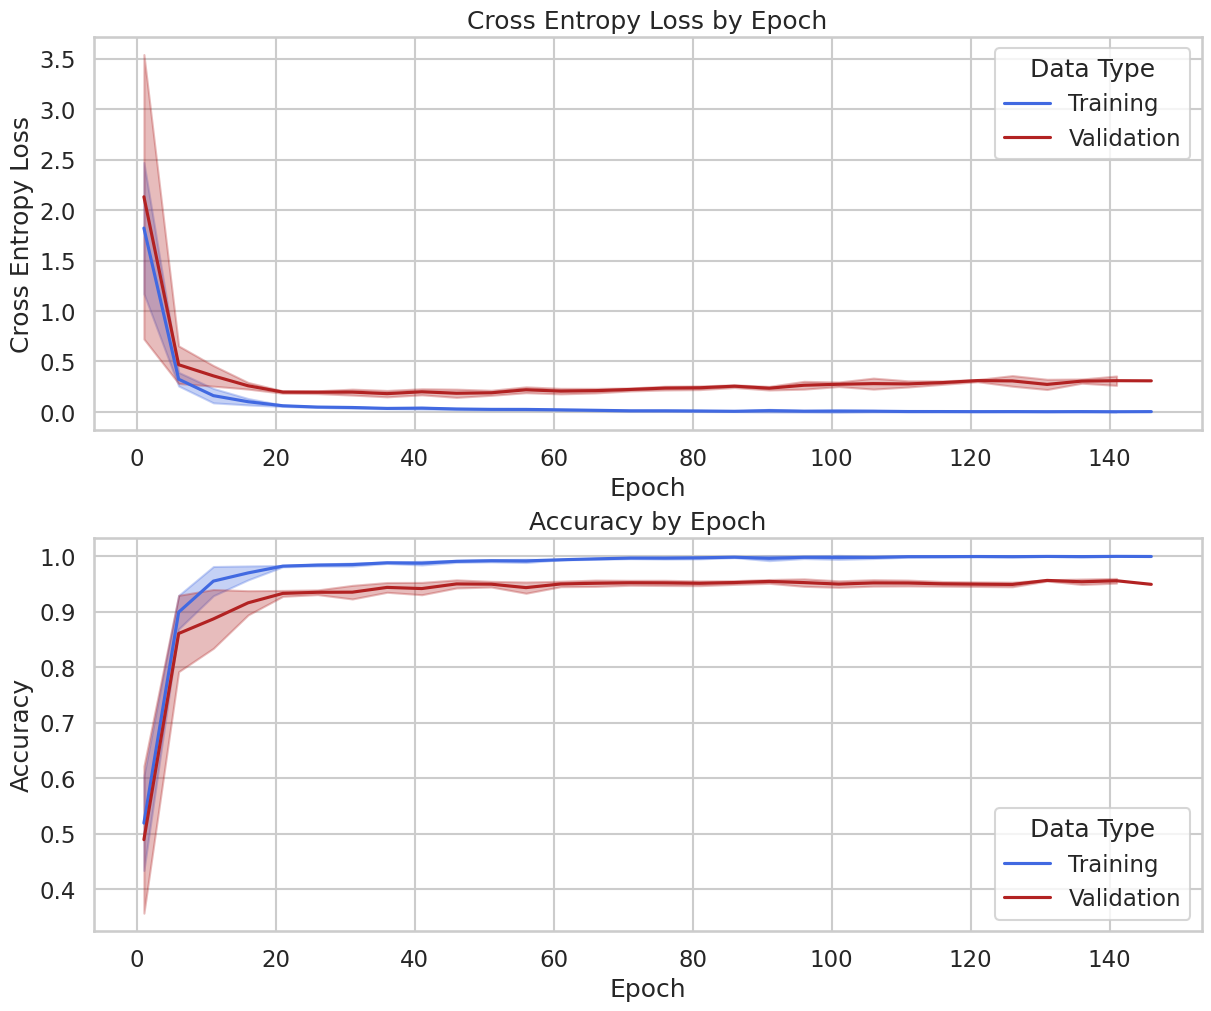

In [33]:
# Plot Metrics (e.g., accuracy per fold)
result_df = pd.read_csv(os.path.join(train_data, 'cross_validation_results.csv'))
plotter = SimpleTrainingMetricsPlotter(result_df)
plotter.plot_metrics(downsample=5, marker_size=2)


In [34]:
X = test_dataset.features

In [35]:
X

array([[5.11866165e-01, 1.59486251e+02, 1.61319559e+02, ...,
        3.57790952e-02, 5.26056172e-01, 4.95144373e-03],
       [7.44846777e-01, 1.39044226e+02, 1.41992958e+02, ...,
        3.00266987e-02, 3.96827137e-01, 6.05195652e-03],
       [8.84102568e-01, 1.97842504e+02, 2.11896201e+02, ...,
        3.86714152e-02, 1.00711107e+00, 2.23565331e-03],
       ...,
       [8.12777034e-01, 1.82015117e+02, 1.86954540e+02, ...,
        3.55962307e-02, 5.80216404e-01, 3.23834209e-03],
       [8.55846582e-01, 2.56604629e+02, 2.83748128e+02, ...,
        3.74576484e-02, 8.55807450e-01, 3.03195406e-03],
       [6.96175795e-01, 2.25502109e+02, 2.22912539e+02, ...,
        3.18217520e-02, 5.12035770e-01, 3.14307018e-03]])

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier

X = test_dataset.features

# Load the trained model
clf = TabNetClassifier()
clf.load_model('/app/models/best_model_fold_5.zip')

# Assuming X_train is your training dataset
explain_matrix, masks = clf.explain(X)

# Calculate mean importance over the entire dataset
feature_importances = explain_matrix.mean(axis=0)

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


RuntimeError: running_mean should contain 306 elements not 1586

In [21]:
feature_importances

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the feature names in a list called 'feature_names'
feature_names = X.columns.tolist()  # if X_train is a DataFrame

# Sort features by importance
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'